In [1]:
import cv2
import numpy as np
from matplotlib import pyplot as plt
import glob

In [2]:
import sys

In [3]:
sys.path

['/Users/verakocetkova/Desktop/Data Science/ComputerVision/notebooks',
 '/Users/verakocetkova/.conda/envs/ComputerVision/lib/python310.zip',
 '/Users/verakocetkova/.conda/envs/ComputerVision/lib/python3.10',
 '/Users/verakocetkova/.conda/envs/ComputerVision/lib/python3.10/lib-dynload',
 '',
 '/Users/verakocetkova/.conda/envs/ComputerVision/lib/python3.10/site-packages']

In [4]:
sys.path.append('../')

## find corners in chessboard

In [5]:
criteria = (cv2.TERM_CRITERIA_EPS + cv2.TERM_CRITERIA_MAX_ITER, 30, 0.001)

objp = np.zeros((7*7,3), np.float32)

objp[:,:2] = np.mgrid[0:7,0:7].T.reshape(-1,2)

In [6]:
images = glob.glob("../images_camera/*.jpeg")

In [7]:
images

['../images_camera/1DEC4A0D-A317-4321-9539-FD76924B6908_1_105_c.jpeg',
 '../images_camera/BCDA1735-396F-4CF4-9DD8-52C42452C1BC_1_105_c.jpeg',
 '../images_camera/5B6CE418-63DC-4A8B-B9BB-660F9ECA63F7_1_105_c.jpeg',
 '../images_camera/B50750FC-CBB9-4F06-B1CC-BA8D3FF52E7F_1_105_c.jpeg',
 '../images_camera/FA6EE765-380E-4866-889A-500EFA0A8412_1_105_c.jpeg',
 '../images_camera/80604FD2-022A-4088-9EB6-02E553A01C99_1_105_c.jpeg',
 '../images_camera/C7663365-53CE-49A5-A211-A1159971DB60_1_105_c.jpeg',
 '../images_camera/FAE1622C-97BD-421C-A5C3-9634AA3195F5_1_105_c.jpeg',
 '../images_camera/5C329AF8-CC3B-4590-A59E-7B36F3C05862_1_105_c.jpeg',
 '../images_camera/40C92F85-DC45-4ED5-80DA-30DA25E897FC_1_105_c.jpeg',
 '../images_camera/D0EC4A46-3ECA-4F84-972F-5989CF6A43AB_1_105_c.jpeg']

In [8]:
objpoints = []
imgpoints = []

for fname in images:
    img = cv2.imread(fname)
    gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
    # Find the chess board corners
    ret, corners = cv2.findChessboardCorners(gray, (7,7), None)
    # If found, add object points, image points (after refining them)
    if ret == True:
        objpoints.append(objp)
        corners2=cv2.cornerSubPix(gray,corners, (11,11), (-1,-1), criteria)
        imgpoints.append(corners)
        # Draw and display the corners
        cv2.drawChessboardCorners(img, (7,7), corners2, ret)
        cv2.imshow('img', img)
        cv2.waitKey(500)
cv2.destroyAllWindows()

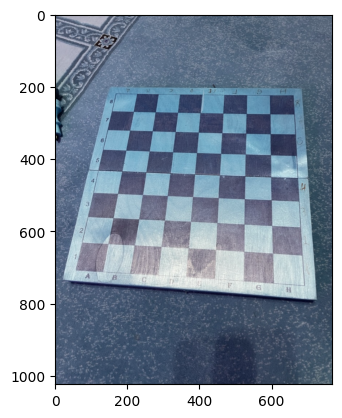

In [13]:
plt.imshow(img);

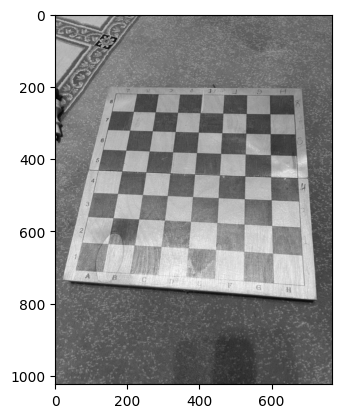

In [14]:
plt.imshow(gray, "gray");

## calibration

In [15]:
ret, mtx, dist, rvecs, tvecs = cv2.calibrateCamera(objpoints, imgpoints, gray.shape[::-1], None, None)

In [18]:
mtx

array([[737.62661996,   0.        , 380.37567845],
       [  0.        , 859.46518567, 727.78254896],
       [  0.        ,   0.        ,   1.        ]])

## undistored

In [33]:
def check_result(objpoints, imgpoints, mtx, dist, rvecs, tvecs):
    mean_error = 0
    for i in range(len(objpoints)):
        imgpoints2, _ = cv2.projectPoints(objpoints[i], rvecs[i], tvecs[i], mtx, dist)
        error = cv2.norm(imgpoints[i], imgpoints2, cv2.NORM_L2)/len(imgpoints2)
        mean_error += error
    print( "total error: {}".format(mean_error/len(objpoints)) )

receive new matrix with calibration

In [19]:
img = cv2.imread('../images_camera/1DEC4A0D-A317-4321-9539-FD76924B6908_1_105_c.jpeg')
h,  w = img.shape[:2]
newcameramtx, roi=cv2.getOptimalNewCameraMatrix(mtx, dist, (w,h), 1, (w,h))


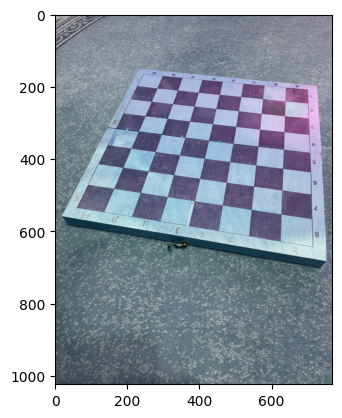

In [20]:
plt.imshow(img)

let's try method Undistort to fix the photo

In [30]:
dst = cv2.undistort(img, mtx, dist, None, newcameramtx)
# crop the image
x, y, w, h = roi
dst = dst[y:y+h, x:x+w]
cv2.imwrite('../images_camera/calibresult.png', dst)


True

In [34]:
check_result(objpoints, imgpoints, mtx, dist, rvecs, tvecs)

total error: 0.07544082684124963


Here let's try another method

In [35]:
mapx, mapy = cv2.initUndistortRectifyMap(mtx, dist, None, newcameramtx, (w,h), 5)
dst = cv2.remap(img, mapx, mapy, cv2.INTER_LINEAR)
# crop the image
x, y, w, h = roi
dst = dst[y:y+h, x:x+w]
cv2.imwrite('calibresult.png', dst)


True

In [37]:
check_result(objpoints, imgpoints, mtx, dist, rvecs, tvecs)

total error: 0.07544082684124963


errors are very similar